In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from nltk.corpus import stopwords
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
salary = pd.read_csv("E:/DataScience/Assignments/Naive Bayes/SalaryData_Train.csv")

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
Salary = salary['Salary']

data = salary.drop('Salary', axis=1)

In [6]:
Salary

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [7]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [8]:
numeric = ["age","educationno","capitalgain","capitalloss","hoursperweek"]

In [9]:
scaler = MinMaxScaler()
data[['age','educationno','capitalgain','capitalloss','hoursperweek']] = scaler.fit_transform(data[['age','educationno','capitalgain','capitalloss','hoursperweek']])

In [10]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,Private,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States
30157,0.315068,Private,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States
30158,0.561644,Private,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States
30159,0.068493,Private,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States


In [11]:
le = preprocessing.LabelEncoder()
le.fit(Salary)
Salary=le.transform(Salary)

In [12]:
Salary

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
Salary = pd.DataFrame(Salary, columns=["salary"])

In [15]:
data = pd.get_dummies(data)

In [16]:
encoded = list(data.columns)

In [17]:
encoded

['age',
 'educationno',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'maritalstatus_ Divorced',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_

In [18]:
from pandas import DataFrame

In [19]:
data1 = DataFrame(encoded, columns=['Data']) 

In [20]:
data1

,Data
0,age
1,educationno
2,capitalgain
3,capitalloss
4,hoursperweek
...,...
97,native_ Thailand
98,native_ Trinadad&Tobago
99,native_ United-States
100,native_ Vietnam


In [21]:
def clean_text(text):
    text = text.lower()
    text = re.sub('_', '', text)
    text = re.sub('-','',text)
    return text
clean = lambda x: clean_text(x)

In [22]:
data1['Data'] = data1.Data.apply(clean)

In [23]:
data1.Data

0                         age
1                 educationno
2                 capitalgain
3                 capitalloss
4                hoursperweek
                ...          
97            native thailand
98     native trinadad&tobago
99        native unitedstates
100            native vietnam
101         native yugoslavia
Name: Data, Length: 102, dtype: object

In [24]:
freq = pd.Series(''.join(data1['Data']).split()).value_counts()
freq

francenative                     1
taiwannative                     1
notinfamilyrelationship          1
chinanative                      1
protectiveservoccupation         1
                                ..
columbianative                   1
marriedcivspousemaritalstatus    1
armedforcesoccupation            1
indianative                      1
englandnative                    1
Length: 98, dtype: int64

In [25]:
stop = stopwords.words('english')
data1['Data'] = data1['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [26]:
freq = pd.Series(' '.join(data1['Data']).split()).value_counts()[:30]
freq

native                 40
education              16
occupation             14
workclass               7
maritalstatus           7
relationship            6
race                    5
sex                     2
iran                    1
hsgrad                  1
honduras                1
ecuador                 1
techsupport             1
withoutpay              1
guatemala               1
profspecialty           1
marriedspouseabsent     1
localgov                1
poland                  1
india                   1
stategov                1
wife                    1
assocacdm               1
transportmoving         1
france                  1
privhouseserv           1
thailand                1
vietnam                 1
peru                    1
capitalgain             1
dtype: int64

In [27]:
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(data1["Data"])
word_freq = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq['frequency'] = word_freq['occurrences']/np.sum(word_freq['occurrences'])

In [28]:
word_freq

,term,occurrences,frequency
0,10th,1,0.005
1,11th,1,0.005
2,12th,1,0.005
3,1st4th,1,0.005
4,5th6th,1,0.005
...,...,...,...
106,widowed,1,0.005
107,wife,1,0.005
108,withoutpay,1,0.005
109,workclass,7,0.035


In [29]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1500, max_df=0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(data1["Data"])
names = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names)

In [30]:
df

,10th,11th,12th,1st4th,5th6th,7th8th,9th,admclerical,age,amerindianeskimo,...,trinadad,unitedstates,unmarried,vietnam,white,widowed,wife,withoutpay,workclass,yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.681813,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.932041,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.932041,0.0,0.0,0.0,0.0,0.0,0.000000


N-Gram


In [31]:
def get_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [32]:
top_words = get_words(data1["Data"], n=400)
top_df = pd.DataFrame(top_words)
top_df.columns=["BiGram","Freq"]
top_df

,BiGram,Freq
0,workclass federalgov,1
1,workclass localgov,1
2,workclass private,1
3,workclass selfempinc,1
4,workclass selfempnotinc,1
...,...,...
93,native trinadad,1
94,trinadad tobago,1
95,native unitedstates,1
96,native vietnam,1


[Text(0, 0, 'occupation protectiveserv'),
 Text(1, 0, 'occupation sales'),
 Text(2, 0, 'occupation techsupport'),
 Text(3, 0, 'occupation transportmoving'),
 Text(4, 0, 'relationship husband'),
 Text(5, 0, 'relationship notinfamily'),
 Text(6, 0, 'relationship otherrelative'),
 Text(7, 0, 'relationship ownchild'),
 Text(8, 0, 'relationship unmarried'),
 Text(9, 0, 'relationship wife'),
 Text(10, 0, 'race amerindianeskimo'),
 Text(11, 0, 'race asianpacislander'),
 Text(12, 0, 'race black'),
 Text(13, 0, 'race white'),
 Text(14, 0, 'sex female'),
 Text(15, 0, 'sex male'),
 Text(16, 0, 'native cambodia'),
 Text(17, 0, 'native canada'),
 Text(18, 0, 'native china'),
 Text(19, 0, 'native columbia'),
 Text(20, 0, 'native cuba')]

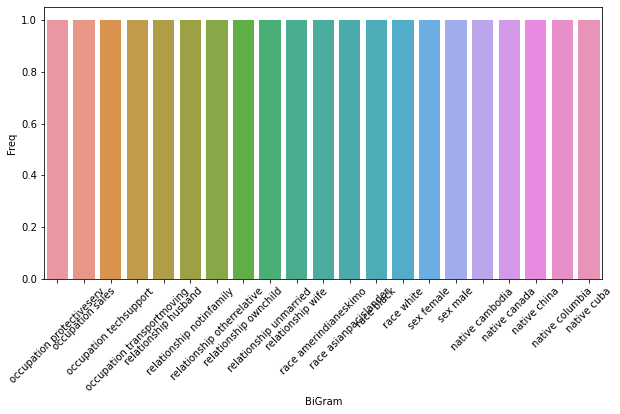

In [33]:
top_bigram = top_df.iloc[40:61,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top_bigram["BiGram"],y=top_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top_bigram["BiGram"])

In [34]:
def get_top_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [35]:
top3_words = get_top_words(data1["Data"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [36]:
top3_df

,Tri-gram,Freq
0,native outlyingus guamusvietc,1
1,native trinadad tobago,1


WordCloud

In [37]:
string = " ".join(data1["Data"])

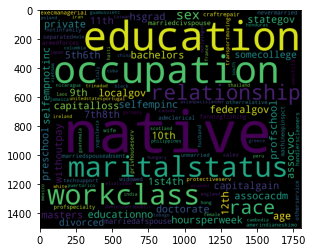

In [38]:
wordcloud = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string)
plt.imshow(wordcloud)

In [39]:
data1.head()

,Data
0,age
1,educationno
2,capitalgain
3,capitalloss
4,hoursperweek


In [40]:
Salary

,salary
0,0
1,0
2,0
3,0
4,0
...,...
30156,0
30157,1
30158,0
30159,0


In [41]:
data2 = pd.concat([data1,Salary], axis=1)

In [42]:
data2

,Data,salary
0,age,0
1,educationno,0
2,capitalgain,0
3,capitalloss,0
4,hoursperweek,0
...,...,...
30156,NaN,0
30157,NaN,1
30158,NaN,0
30159,NaN,0


In [43]:
data2=data2.dropna()

In [44]:
salary_train,salary_test = train_test_split(data2,test_size=0.3)

In [45]:
salary_test

,Data,salary
11,workclass withoutpay,1
78,native hungary,0
44,occupation profspecialty,0
20,education assocvoc,0
62,native cambodia,1
86,native mexico,1
22,education doctorate,0
35,occupation admclerical,0
99,native unitedstates,0
37,occupation craftrepair,0


In [46]:
def split_into_words(i):
    return (i.split(" "))

In [47]:
salary_bow = CountVectorizer(analyzer = split_into_words).fit(data2.Data)

In [48]:
matrix = salary_bow.transform(data2.Data)
matrix.shape

(102, 109)

In [49]:
train_matrix = salary_bow.transform(salary_train.Data)
train_matrix.shape

(71, 109)

In [50]:
test_matrix = salary_bow.transform(salary_test.Data)
test_matrix.shape

(31, 109)

In [51]:
classifier_mb = MB()
classifier_mb.fit(train_matrix,salary_train.salary)
train_pred_m = classifier_mb.predict(train_matrix)
accuracy_train_m = np.mean(train_pred_m==salary_train.salary)

test_pred_m = classifier_mb.predict(test_matrix)
accuracy_test_m = np.mean(test_pred_m==salary_test.salary)

In [52]:
classifier_gb = GB()
classifier_gb.fit(train_matrix.toarray(),salary_train.salary.values) 
train_pred_g = classifier_gb.predict(train_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==salary_train.salary)

test_pred_g = classifier_gb.predict(test_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==salary_test.salary)

Using TFIDF

In [53]:
tfidf_transformer = TfidfTransformer().fit(matrix)

train_tfidf = tfidf_transformer.transform(train_matrix)

train_tfidf.shape

test_tfidf = tfidf_transformer.transform(test_matrix)

test_tfidf.shape

(31, 109)

In [54]:
classifier_mb = MB()
classifier_mb.fit(train_matrix,salary_train.salary)
train_pred_m = classifier_mb.predict(train_matrix)
accuracy_train_m = np.mean(train_pred_m==salary_train.salary)

test_pred_m = classifier_mb.predict(test_matrix)
accuracy_test_m = np.mean(test_pred_m==salary_test.salary)

In [55]:
accuracy_train_m,accuracy_test_m

(0.8169014084507042, 0.7741935483870968)

In [56]:
classifier_gb = GB()
classifier_gb.fit(train_matrix.toarray(),salary_train.salary.values) 
train_pred_g = classifier_gb.predict(train_matrix.toarray())
accuracy_train_g = np.mean(train_pred_g==salary_train.salary)

test_pred_g = classifier_gb.predict(test_matrix.toarray())
accuracy_test_g = np.mean(test_pred_g==salary_test.salary)

In [57]:
accuracy_train_g, accuracy_test_g

(1.0, 0.25806451612903225)

In [58]:
salary_train

,Data,salary
36,occupation armedforces,0
32,maritalstatus nevermarried,0
24,education masters,1
83,native jamaica,0
43,occupation privhouseserv,0
...,...,...
23,education hsgrad,0
58,race,1
57,race black,0
29,maritalstatus marriedafspouse,0
